<a href="https://colab.research.google.com/github/sanyhmahadi/ChildSentimentDetectionWith6Algorithms/blob/main/Iffat_six_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/research_more_trial/ChildSentimentAnalysis.xlsx")
df.head(10)

,Comment,Category
0,"শিশুবান্ধব নীতি শুধু শিশুদের জন্যই ভালো নয়, তা...",neutral
1,কাউকে মিথ্যা বলবেন না,positive
2,বিশ্বের বৃহত্তম শরণার্থী বসতিগুলোর মধ্যে অন্যত...,positive
3,অনেক শিশু তাদের শিক্ষণ কেন্দ্রগুলোকে পুড়ে ছাই ...,negative
4,হারিয়ে যাওয়া শিশুদের আশ্রয় দেওয়া মহৎ কাজ,positive
5,দুর্যোগে ক্ষতিগ্রস্ত সকল রোহিঙ্গা শিশু এবং পরি...,positive
6,কোভিড -১৯ এর বিস্তারের ফলে দেশব্যাপী মাতৃ এবং ...,negative
7,বাংলাদেশের পাঁচটি দরিদ্রতম জেলার একটি হিসাবে ভ...,negative
8,শিশুদের অক্সিজেন থেরাপির প্রয়োজন রয়েছে এমন জট...,positive
9,স্বাস্থ্যসেবার ক্ষে্ত্রে যে গুরুতর সমস্যা রয়েছ...,positive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(1000, 2)

**Normalizing and simple Preprocessing**

In [ ]:
df['Comment'] = df['Comment'].fillna("কাউকে মিথ্যা বলবেন না")

In [ ]:
df['Category'] = df['Category'].fillna(1)

In [ ]:
df.head(10)

,Comment,Category
0,"শিশুবান্ধব নীতি শুধু শিশুদের জন্যই ভালো নয়, তা...",neutral
1,কাউকে মিথ্যা বলবেন না,positive
2,বিশ্বের বৃহত্তম শরণার্থী বসতিগুলোর মধ্যে অন্যত...,positive
3,অনেক শিশু তাদের শিক্ষণ কেন্দ্রগুলোকে পুড়ে ছাই ...,negative
4,হারিয়ে যাওয়া শিশুদের আশ্রয় দেওয়া মহৎ কাজ,positive
5,দুর্যোগে ক্ষতিগ্রস্ত সকল রোহিঙ্গা শিশু এবং পরি...,positive
6,কোভিড -১৯ এর বিস্তারের ফলে দেশব্যাপী মাতৃ এবং ...,negative
7,বাংলাদেশের পাঁচটি দরিদ্রতম জেলার একটি হিসাবে ভ...,negative
8,শিশুদের অক্সিজেন থেরাপির প্রয়োজন রয়েছে এমন জট...,positive
9,স্বাস্থ্যসেবার ক্ষে্ত্রে যে গুরুতর সমস্যা রয়েছ...,positive


In [ ]:
df.isnull().sum()

Comment     0
Category    0
dtype: int64

In [ ]:
df.dropna()

,Comment,Category
0,"শিশুবান্ধব নীতি শুধু শিশুদের জন্যই ভালো নয়, তা...",neutral
1,কাউকে মিথ্যা বলবেন না,positive
2,বিশ্বের বৃহত্তম শরণার্থী বসতিগুলোর মধ্যে অন্যত...,positive
3,অনেক শিশু তাদের শিক্ষণ কেন্দ্রগুলোকে পুড়ে ছাই ...,negative
4,হারিয়ে যাওয়া শিশুদের আশ্রয় দেওয়া মহৎ কাজ,positive
...,...,...
995,"মানুষ লক্ষ্যপূরণের জন্য লড়াই করে, লক্ষ্যহীন মা...",neutral
996,"পথ পেরোলে ক্লান্তি আসে, কাঁধের কাছটা ব্যাথাও হ...",neutral
997,বাংলাদেশের মাধ্যমিক শিক্ষার অগ্রগতি ও প্রগতিশী...,neutral
998,বিনা যুদ্ধে নাহি দিব সূচ্যগ্র মেদিনী,neutral


In [ ]:
len(df[df.Category=='positive'])

333

In [ ]:
len(df[df.Category=='neutral'])

333

In [ ]:
len(df[df.Category=='negative'])

333

In [ ]:
df.Category = df.Category.replace({'negative': 1, 'positive': 0,'neutral': 2})

In [ ]:
df.Category=pd.to_numeric(df.Category)

**Data Visualization**

In [ ]:
for i in range(5):
  print("Comment:",i+1)
  print("Details:",df.Comment[i])

Comment: 1
Details: শিশুবান্ধব নীতি শুধু শিশুদের জন্যই ভালো নয়, তা ব্যবসার জন্যও ভালো
Comment: 2
Details: কাউকে মিথ্যা বলবেন না
Comment: 3
Details: বিশ্বের বৃহত্তম শরণার্থী বসতিগুলোর মধ্যে অন্যতম বাংলাদেশের রোহিঙ্গা শরনার্থীদের আশ্রয়শিবিরে বিপর্যয়কর অগ্নিকাণ্ডে সহায়তা দিতে ইউনিসেফ এবং এর সহযোগীরা প্রচুর পরিমাণে ত্রাণ সহায়তা কার্যক্রম চালাচ্ছে
Comment: 4
Details: অনেক শিশু তাদের শিক্ষণ কেন্দ্রগুলোকে পুড়ে ছাই হয়ে যেতে দেখেছে।
Comment: 5
Details: হারিয়ে যাওয়া শিশুদের আশ্রয় দেওয়া মহৎ কাজ


In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

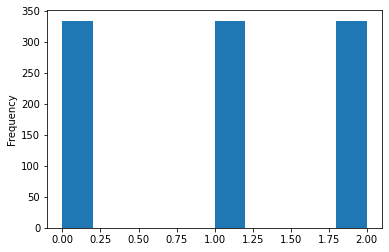

In [ ]:
df['Category'].plot(kind='hist')

In [ ]:
df['length'] = df['Comment'].str.split().apply(len)
df.head(10)

,Comment,Category,length
0,"শিশুবান্ধব নীতি শুধু শিশুদের জন্যই ভালো নয়, তা...",2,11
1,কাউকে মিথ্যা বলবেন না,0,4
2,বিশ্বের বৃহত্তম শরণার্থী বসতিগুলোর মধ্যে অন্যত...,0,24
3,অনেক শিশু তাদের শিক্ষণ কেন্দ্রগুলোকে পুড়ে ছাই ...,1,10
4,হারিয়ে যাওয়া শিশুদের আশ্রয় দেওয়া মহৎ কাজ,0,7
5,দুর্যোগে ক্ষতিগ্রস্ত সকল রোহিঙ্গা শিশু এবং পরি...,0,12
6,কোভিড -১৯ এর বিস্তারের ফলে দেশব্যাপী মাতৃ এবং ...,1,20
7,বাংলাদেশের পাঁচটি দরিদ্রতম জেলার একটি হিসাবে ভ...,1,10
8,শিশুদের অক্সিজেন থেরাপির প্রয়োজন রয়েছে এমন জট...,0,22
9,স্বাস্থ্যসেবার ক্ষে্ত্রে যে গুরুতর সমস্যা রয়েছ...,0,15


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdeaf1a1890>,
      dtype=object)

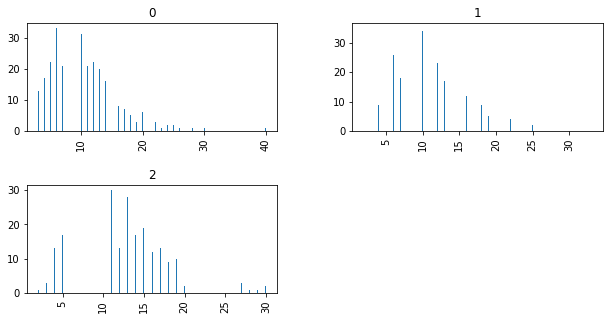

In [ ]:
df.hist(column='length', by = 'Category',bins = 450, figsize=(10,5))

In [ ]:
df.length.describe()

count    1000.000000
mean       11.200000
std         5.423783
min         2.000000
25%         7.000000
50%        10.000000
75%        14.000000
max        40.000000
Name: length, dtype: float64

**Preprocessing Part**

In [ ]:
import string
def remove_punc(s):
  table = str.maketrans({key: None for key in string.punctuation})
  return s.translate(table)

In [ ]:
x = df['Comment'].fillna(' ')
y = df['Category']
print(x.head())
print(y.head())

0    শিশুবান্ধব নীতি শুধু শিশুদের জন্যই ভালো নয়, তা...
1                                কাউকে মিথ্যা বলবেন না
2    বিশ্বের বৃহত্তম শরণার্থী বসতিগুলোর মধ্যে অন্যত...
3    অনেক শিশু তাদের শিক্ষণ কেন্দ্রগুলোকে পুড়ে ছাই ...
4           হারিয়ে যাওয়া শিশুদের আশ্রয় দেওয়া মহৎ কাজ
Name: Comment, dtype: object
0    2
1    0
2    0
3    1
4    0
Name: Category, dtype: int64


In [ ]:
x = df['Comment'].apply(remove_punc)
x.shape

(1000,)

In [ ]:
contractions = { 
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

In [ ]:
 import string
 import re
 def clean_text(text,remove_stopwords = False):
     if True:
         text = text.split()
         new_text = []
         for word in text:
             if word in contractions:
                 new_text.append(contractions[word])
             else:
                 new_text.append(word)
         text = " ".join(new_text)
     # Format words and remove unwanted characters
     whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
     bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
     english_chars = u"[a-zA-Z0-9]"
     punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
     bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    
     punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    
     text = re.sub(bangla_digits, " ", text)
     text = re.sub(punc, " ", text)
     text = re.sub(english_chars, " ", text)
     text = re.sub(bangla_fullstop, " ", text)
     text = re.sub(punctSeq, " ", text)
     text = whitespace.sub(" ", text).strip()
    
     text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
     text = re.sub(r'\<a href', ' ', text)
     text = re.sub(r'&amp;‘:‘ ’', '', text) 
     text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', text)
     text = re.sub(r'<br />', ' ', text)
     text = re.sub(r'\'', ' ', text)
     text = re.sub(r"[\@$#%~+-\.\'।\"]"," ",text)
     text = re.sub(r"(?m)^\s+", "", text)
     text = re.sub("[()]","",text)
     text = re.sub("[‘’]","",text)
     text = re.sub("[!]","",text)
     text = re.sub("[/]","",text)
     text = re.sub("[:]","",text)
     text= re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',text)
     text= text.strip("/")
    
     if remove_stopwords:
         k = []
         with open('/content/drive/MyDrive/Research On child sentiment/Banglastopword.txt', 'r',encoding="utf-8") as f:
             for word in f:
                 word = word.split()
                 k.append(word[0])
             text = [t for t in text if t not in k]
             text = "".join(text)
            
     return text

**Importing Library**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy as np
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, log_loss, cohen_kappa_score, roc_auc_score, roc_curve
from sklearn import metrics
%matplotlib inline

**Transform a text into a vector**

In [ ]:
vocab = CountVectorizer(ngram_range=(1,1),analyzer='word',encoding='utf-8').fit(x)

In [ ]:
print(vocab.vocabulary_)

print("\n")

x = vocab.transform(x) 
print(x.toarray())

print("\n")

print(vocab.get_feature_names())

{'ধব': 529, 'জন': 376, 'যই': 728, 'নয়': 575, 'যবস': 749, 'যও': 729, 'উক': 137, 'বলব': 663, 'হত': 998, 'তম': 476, 'শরণ': 886, 'বসত': 668, 'মধ': 705, 'অন': 12, 'যতম': 741, 'শরন': 887, 'আশ': 94, 'রয়শ': 841, 'পর': 601, 'যয': 754, 'কর': 264, 'অগ': 1, 'সহ': 981, 'য়ত': 1026, 'ইউন': 112, 'এব': 203, 'এর': 209, 'সহয': 987, 'রচ': 776, 'যক': 730, 'রম': 814, 'ষণ': 899, 'রগ': 772, 'হয': 1003, 'ওয়': 229, 'রয': 822, 'ওয': 227, 'মহৎ': 725, 'ষত': 903, 'রস': 827, 'সকল': 923, 'রত': 792, 'আমর': 86, 'সমব': 957, 'দন': 503, 'রক': 766, 'করছ': 266, '১৯': 1052, 'ফল': 625, 'শব': 883, 'এমস': 208, 'এইচ': 178, 'সম': 954, 'রহণ': 832, '৫০': 1075, 'শত': 877, 'চট': 340, 'দর': 512, 'রতম': 794, 'একট': 186, 'বতন': 643, 'অক': 0, 'রয়': 840, 'এমন': 204, 'জট': 373, 'এখন': 193, 'আগ': 58, 'লন': 860, 'আত': 68, 'মব': 710, 'আরও': 90, 'খল': 292, 'যস': 756, 'তর': 478, 'সমস': 962, 'ড১৯': 436, 'নত': 552, 'নভ': 565, 'আল': 91, 'চন': 343, 'এন': 200, 'ছএমনক': 354, 'সমগ': 955, 'নবজ': 560, 'তক': 446, 'টগ': 417, 'পন': 597, 'অবদ': 25, 'ফর': 62

In [ ]:
print("Shape of the sparse matrix: ", x.shape)
print("Non-Zero occurences: ",x.nnz)
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (1000, 1090)
Non-Zero occurences:  7453
Density of the matrix =  0.6837614678899082


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=999)

Confusion matrix of model is :
[[25  3  7]
 [12 16  5]
 [16  6 10]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.47      0.71      0.57        35
           1       0.64      0.48      0.55        33
           2       0.45      0.31      0.37        32

    accuracy                           0.51       100
   macro avg       0.52      0.50      0.50       100
weighted avg       0.52      0.51      0.50       100


Testing accuracy :  73.21428571428571
Sensitivity :  0.6756756756756757
Specificity :  0.8421052631578947
false positive rate :  0.15789473684210525
false negative rate :  0.32432432432432434
Negative Predictive Value :  0.5714285714285714
False Discovery rate :  0.10714285714285714
Mean Absolute Error: 0.72
Mean Squared Error: 1.18
Root Mean Squared Error: 1.0862780491200215
Cohen_Kappa_Score: 0.25937122128174117




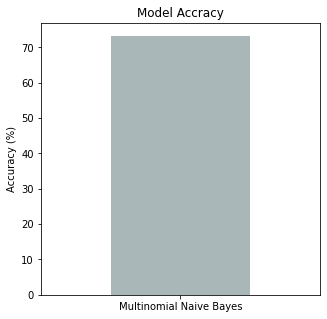

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
print('Confusion matrix of model is :')
cm = confusion_matrix(y_test,mnb.predict(x_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
result1 = classification_report(y_test, mnb.predict(x_test))
print("Classification Report : ",)
print (result1)
print()
var1 = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var1)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,mnb.predict(x_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, mnb.predict(x_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,mnb.predict(x_test))))
#print('Log_Loss:', metrics.log_loss(y_test,mnb.predict(x_test)))
print('Cohen_Kappa_Score:', cohen_kappa_score(y_test, mnb.predict(x_test)))

print()
print()
name = ['Multinomial Naive Bayes']
col_value = ['#95a5a6']
model_accuracy = pd.Series(data=[var1], index=[name[0]])
fig = plt.figure(figsize=(5,5))
width = 0.75 
model_accuracy.sort_values().plot.bar(alpha=0.8, color=[col_value[0]])
plt.xticks(rotation=0)
plt.title('Model Accracy')
plt.ylabel('Accuracy (%)')
plt.show()
print()
print()

Confusion matrix of model is :
[[22  7  6]
 [11 19  3]
 [18  5  9]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.43      0.63      0.51        35
           1       0.61      0.58      0.59        33
           2       0.50      0.28      0.36        32

    accuracy                           0.50       100
   macro avg       0.51      0.50      0.49       100
weighted avg       0.51      0.50      0.49       100


Testing accuracy :  69.49152542372882
Sensitivity :  0.6666666666666666
Specificity :  0.7307692307692307
false positive rate :  0.2692307692307692
false negative rate :  0.3333333333333333
Negative Predictive Value :  0.6333333333333333
False Discovery rate :  0.2413793103448276
Mean Absolute Error: 0.74
Mean Squared Error: 1.22
Root Mean Squared Error: 1.104536101718726
Cohen_Kappa_Score: 0.24425634824667464




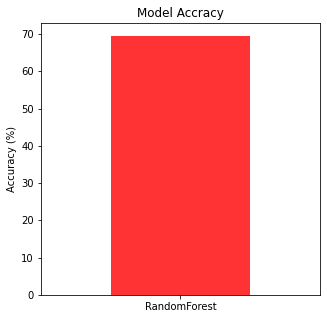

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
print('Confusion matrix of model is :')
cm = confusion_matrix(y_test,rmfr.predict(x_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
result1 = classification_report(y_test, rmfr.predict(x_test))
print("Classification Report : ",)
print (result1)
print()
var2 = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var2)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,rmfr.predict(x_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rmfr.predict(x_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,rmfr.predict(x_test))))
#print('Log_Loss:', metrics.log_loss(y_test,rmfr.predict(x_test)))
print('Cohen_Kappa_Score:', cohen_kappa_score(y_test, rmfr.predict(x_test)))

print()
print()
name = ['RandomForest']
col_value = ['red']
model_accuracy = pd.Series(data=[var2], index=[name[0]])
fig = plt.figure(figsize=(5,5))
width = 0.75 
model_accuracy.sort_values().plot.bar(alpha=0.8, color=[col_value[0]])
plt.xticks(rotation=0)
plt.title('Model Accracy')
plt.ylabel('Accuracy (%)')
plt.show()
print()
print()

Confusion matrix of model is :
[[20  7  8]
 [10 12 11]
 [20  4  8]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.40      0.57      0.47        35
           1       0.52      0.36      0.43        33
           2       0.30      0.25      0.27        32

    accuracy                           0.40       100
   macro avg       0.41      0.40      0.39       100
weighted avg       0.41      0.40      0.39       100


Testing accuracy :  65.3061224489796
Sensitivity :  0.6666666666666666
Specificity :  0.631578947368421
false positive rate :  0.3684210526315789
false negative rate :  0.3333333333333333
Negative Predictive Value :  0.5454545454545454
False Discovery rate :  0.25925925925925924
Mean Absolute Error: 0.88
Mean Squared Error: 1.44
Root Mean Squared Error: 1.2
Cohen_Kappa_Score: 0.09461294703485734




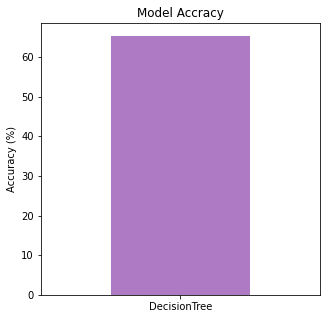

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print('Confusion matrix of model is :')
cm = confusion_matrix(y_test,dt.predict(x_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
result1 = classification_report(y_test, dt.predict(x_test))
print("Classification Report : ",)
print (result1)
print()
var3 = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var3)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,dt.predict(x_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt.predict(x_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,dt.predict(x_test))))
#print('Log_Loss:', metrics.log_loss(y_test,dt.predict(x_test)))
print('Cohen_Kappa_Score:', cohen_kappa_score(y_test, dt.predict(x_test)))

print()
print()
name = ['DecisionTree']
col_value = ['#9b59b6']
model_accuracy = pd.Series(data=[var3], index=[name[0]])
fig = plt.figure(figsize=(5,5))
width = 0.75 
model_accuracy.sort_values().plot.bar(alpha=0.8, color=[col_value[0]])
plt.xticks(rotation=0)
plt.title('Model Accracy')
plt.ylabel('Accuracy (%)')
plt.show()
print()
print()

Confusion matrix of model is :
[[23  5  7]
 [12 18  3]
 [14  7 11]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.47      0.66      0.55        35
           1       0.60      0.55      0.57        33
           2       0.52      0.34      0.42        32

    accuracy                           0.52       100
   macro avg       0.53      0.52      0.51       100
weighted avg       0.53      0.52      0.51       100


Testing accuracy :  70.6896551724138
Sensitivity :  0.6571428571428571
Specificity :  0.782608695652174
false positive rate :  0.21739130434782608
false negative rate :  0.34285714285714286
Negative Predictive Value :  0.6
False Discovery rate :  0.17857142857142858
Mean Absolute Error: 0.69
Mean Squared Error: 1.11
Root Mean Squared Error: 1.0535653752852738
Cohen_Kappa_Score: 0.27525290653782275




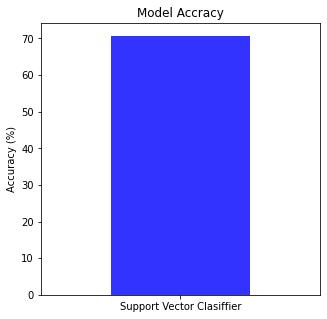

In [ ]:
from sklearn.svm import SVC
import pickle
svm = SVC()
svm.fit(x_train,y_train)
print('Confusion matrix of model is :')
cm = confusion_matrix(y_test,svm.predict(x_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
result1 = classification_report(y_test, svm.predict(x_test))
print("Classification Report : ",)
print (result1)
print()
var4 = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var4)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,svm.predict(x_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svm.predict(x_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,svm.predict(x_test))))
#print('Log_Loss:', metrics.log_loss(y_test,svm.predict(x_test)))
print('Cohen_Kappa_Score:', cohen_kappa_score(y_test, svm.predict(x_test)))

print()
print()
name = ['Support Vector Clasiffier']
col_value = ['blue']
model_accuracy = pd.Series(data=[var4], index=[name[0]])
fig = plt.figure(figsize=(5,5))
width = 0.75 
model_accuracy.sort_values().plot.bar(alpha=0.8, color=[col_value[0]])
plt.xticks(rotation=0)
plt.title('Model Accracy')
plt.ylabel('Accuracy (%)')
plt.show()
print()
print()

Confusion matrix of model is :
[[29  4  2]
 [21  6  6]
 [23  6  3]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.40      0.83      0.54        35
           1       0.38      0.18      0.24        33
           2       0.27      0.09      0.14        32

    accuracy                           0.38       100
   macro avg       0.35      0.37      0.31       100
weighted avg       0.35      0.38      0.31       100


Testing accuracy :  58.333333333333336
Sensitivity :  0.58
Specificity :  0.6
false positive rate :  0.4
false negative rate :  0.42
Negative Predictive Value :  0.2222222222222222
False Discovery rate :  0.12121212121212122
Mean Absolute Error: 0.87
Mean Squared Error: 1.37
Root Mean Squared Error: 1.1704699910719625
Cohen_Kappa_Score: 0.05559786747905571




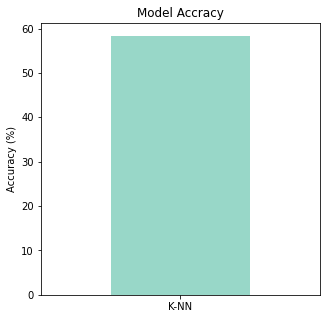

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
print('Confusion matrix of model is :')
cm = confusion_matrix(y_test,knn.predict(x_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
result1 = classification_report(y_test, knn.predict(x_test))
print("Classification Report : ",)
print (result1)
print()
var5 = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var5)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,knn.predict(x_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knn.predict(x_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,knn.predict(x_test))))
#print('Log_Loss:', metrics.log_loss(y_test,knn.predict(x_test)))
print('Cohen_Kappa_Score:', cohen_kappa_score(y_test, knn.predict(x_test)))

print()
print()
name = ['K-NN']
col_value = ['#7fcdbb']
model_accuracy = pd.Series(data=[var5], index=[name[0]])
fig = plt.figure(figsize=(5,5))
width = 0.75 
model_accuracy.sort_values().plot.bar(alpha=0.8, color=[col_value[0]])
plt.xticks(rotation=0)
plt.title('Model Accracy')
plt.ylabel('Accuracy (%)')
plt.show()
print()
print()

Confusion matrix of model 4 is :
[[23  6  6]
 [ 9 17  7]
 [19  4  9]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.45      0.66      0.53        35
           1       0.63      0.52      0.57        33
           2       0.41      0.28      0.33        32

    accuracy                           0.49       100
   macro avg       0.50      0.48      0.48       100
weighted avg       0.50      0.49      0.48       100


Testing accuracy :  72.72727272727273
Sensitivity :  0.71875
Specificity :  0.7391304347826086
false positive rate :  0.2608695652173913
false negative rate :  0.28125
Negative Predictive Value :  0.6538461538461539
False Discovery rate :  0.20689655172413793
Mean Absolute Error: 0.76
Mean Squared Error: 1.26
Root Mean Squared Error: 1.1224972160321824
Cohen_Kappa_Score: 0.22960725075528687




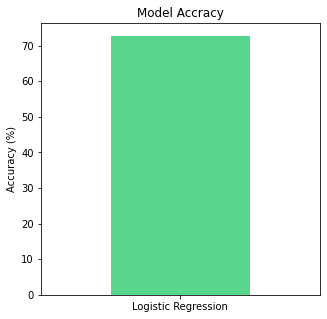

In [ ]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()
l.fit(x_train,y_train)
logi=l.score(x_test,  y_test)
print('Confusion matrix of model',i , 'is :')
cm = confusion_matrix(y_test,l.predict(x_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
result1 = classification_report(y_test, l.predict(x_test))
print("Classification Report : ",)
print (result1)
print()
var6 = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var6)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,l.predict(x_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, l.predict(x_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,l.predict(x_test))))
#print('Log_Loss:', metrics.log_loss(y_test,l.predict(x_test)))
print('Cohen_Kappa_Score:', cohen_kappa_score(y_test, l.predict(x_test)))

print()
print()
name = ['Logistic Regression']
col_value = ['#2ecc71']
model_accuracy = pd.Series(data=[var6], index=[name[0]])
fig = plt.figure(figsize=(5,5))
width = 0.75 
model_accuracy.sort_values().plot.bar(alpha=0.8, color=[col_value[0]])
plt.xticks(rotation=0)
plt.title('Model Accracy')
plt.ylabel('Accuracy (%)')
plt.show()
print()
print()

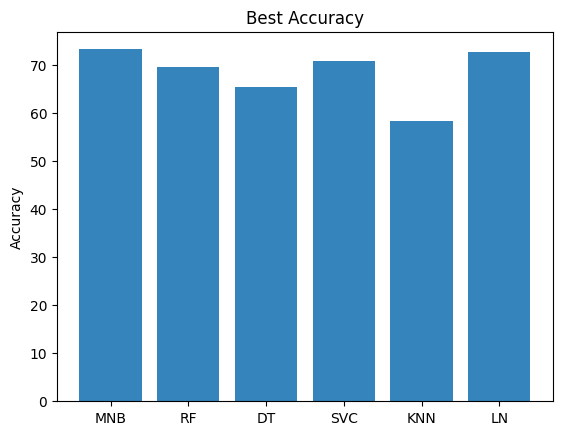

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('MNB','RF','DT','SVC','KNN','LN')
y_pos = np.arange(len(objects))
performance = [var1,var2,var3,var4,var5,var6]
 
plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Best Accuracy')

plt.show()

In [ ]:
news=input()
prt=vocab.transform([news])

m1=mnb.predict(prt)
print("MNV Predicted Rating:",m1)
if m1==0:
  print("Positive")
elif m1==1:
  print("Negative")
else:
  print("Neutral")

m2=rmfr.predict(prt)
print("RF Predicted Rating:",m2)
if m2==0:
  print("Positive")
elif m2==1:
  print("Negative")
else:
  print("Neutral")


m3=dt.predict(prt)
print("DT Predicted Rating:",m3)
if m3==0:
  print("Positive")
elif m3==1:
  print("Negative")
else:
  print("Neutral")


m4=svm.predict(prt)
print("SVM Predicted Rating:",m4)
if m4==0:
  print("Positive")
elif m4==1:
  print("Negative")
else:
  print("Neutral")


m5=knn.predict(prt)
print("KNN Predicted Rating:",m5)
if m5==0:
  print("Positive")
elif m5==1:
  print("Negative")
else:
  print("Neutral")


m6=l.predict(prt)
print("Logistic Predicted Rating:",m6)
if m6==0:
  print("Positive")
elif m6==1:
  print("Negative")
else:
  print("Neutral")


মানুষের আচরণ বৈচিত্র্যপূর্ণ।
MNV Predicted Rating: [2]
Neutral
RF Predicted Rating: [2]
Neutral
DT Predicted Rating: [2]
Neutral
SVM Predicted Rating: [1]
Negative
KNN Predicted Rating: [2]
Neutral
Logistic Predicted Rating: [1]
Negative
